## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [29]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [30]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [31]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [32]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

teste = pd.get_dummies(df)
df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada

y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [33]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [34]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [35]:
X_train

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,-0.128878,-0.498616,-0.432553,-0.473599,1.0,0,1
1,0.825248,-0.205639,-0.498616,-0.432553,-0.488120,1.0,0,1
2,-0.363317,-0.751431,-0.498616,-0.432553,-0.145224,0.0,0,1
3,0.825248,-2.198733,6.897852,1.805972,0.679618,0.0,0,1
4,0.825248,-0.049698,-0.498616,-0.432553,-0.490408,0.0,0,1
...,...,...,...,...,...,...,...,...
911,0.825248,-0.282703,-0.498616,-0.432553,-0.493169,0.0,1,0
912,0.825248,-0.829401,-0.498616,-0.432553,-0.490408,0.0,0,1
913,0.825248,-0.010713,-0.498616,-0.432553,-0.332731,1.0,0,1
914,0.825248,-0.205639,-0.498616,-0.432553,-0.487567,0.0,0,1


In [36]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **Colunas correlacionadas/colineares**

In [37]:
teste.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,1,0,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,1,0,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,0,0,0,1


In [38]:
limit = 0.95
corr = teste.corr()
mask = np.triu(
    np.ones(corr.shape), k=1
).astype(bool)
corr_no_diag = corr.where(mask)
coll = [
    c
    for c in corr_no_diag.columns
    if any(abs(corr_no_diag[c]) > limit)
]
coll

['sex_male']

In [39]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


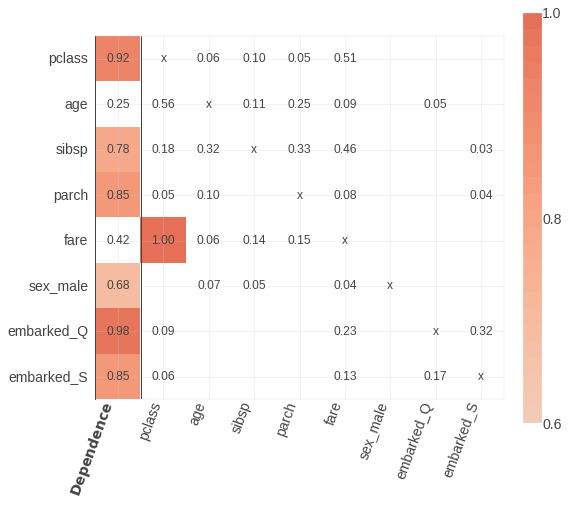

In [40]:
import rfpimp
rfpimp.plot_dependence_heatmap(
    rfpimp.feature_dependence_matrix(X_train),
    value_fontsize=12,
    label_fontsize=14,
    figsize=(8, 8)
)
fig = plt.gcf()

## **Regressão Lasso**

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

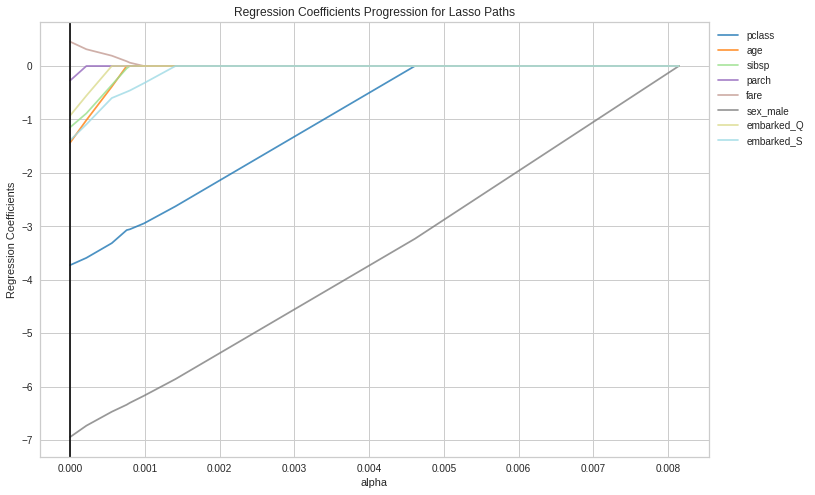

In [41]:
from sklearn import linear_model
model = linear_model.LassoLarsCV(
    cv=10, max_n_alphas=10
).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12, 8))

cm = iter(
    plt.get_cmap("tab20")(
        np.linspace(0, 1, X.shape[1])
    )
)
for i in range(X.shape[1]):
    c = next(cm)
    ax.plot(
        model.alphas_,
        model.coef_path_.T[:, i],
        c=c,
        alpha=0.8,
        label=X.columns[i],
    )
ax.axvline(
    model.alpha_,
    linestyle="-",
    c="k",
    label="alphaCV",
)
plt.ylabel("Regression Coefficients")
ax.legend(X.columns, bbox_to_anchor=(1, 1))
plt.xlabel("alpha")
plt.title(
    "Regression Coefficients Progression for Lasso Paths"
)

## **Eliminação recursiva de atributos**

In [42]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

[1 1 2 3 1 1 5 4]
4
[ True  True False False  True  True False False]


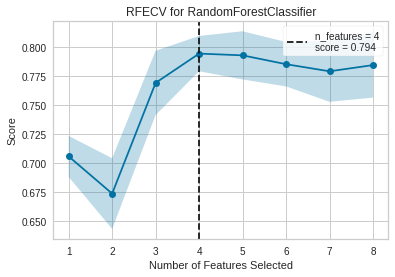

In [43]:
from yellowbrick.features import RFECV
from sklearn.ensemble import RandomForestClassifier
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    RandomForestClassifier(
        n_estimators=100
    ),
    cv=5,
)

rfe.fit(X, y)

print(rfe.rfe_estimator_.ranking_) #ranking dos atributos

print(rfe.rfe_estimator_.n_features_) #numero de features selecionadas

print(rfe.rfe_estimator_.support_) # se for True é pra manter, oque for False é pra excluir

rfe.poof()

In [44]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(
    n_estimators=100
)
rfe = RFE(model, step=5)
rfe.fit(X, y)
X.columns[rfe.support_]


Index(['pclass', 'age', 'fare', 'sex_male'], dtype='object')

## **Informações mútuas**

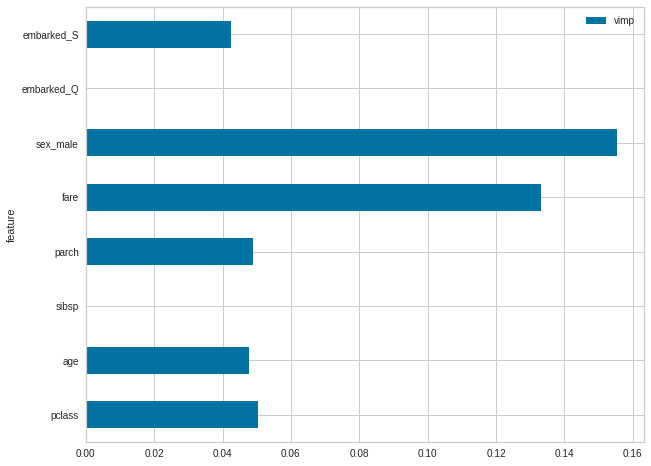

In [45]:
from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(
    X, y
)
fig, ax = plt.subplots(figsize=(10, 8))
(
    pd.DataFrame(
        {"feature": X.columns, "vimp": mic}
    )
    .set_index("feature")
    .plot.barh(ax=ax)
)

## **SelectKBest**

In [49]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X_digits, y_digits = load_digits(return_X_y=True)
X_digits.shape


(1797, 64)

In [50]:
X_digits_new = SelectKBest(chi2, k=4) #escolhe qual estratégia de seleção vai escolher 
X_digits_new.fit_transform(X_digits, y_digits)
X_digits_new.shape

(1797, 4)

## **SelectPercentile**

In [53]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
X_digits, y_digits = load_digits(return_X_y=True)
X_digits.shape

(1797, 64)

In [54]:
X_digits_new = SelectPercentile(mutual_info_classif, percentile=10) #escolhe qual estratégia de seleção vai escolher 
X_digits_new.fit_transform(X_digits, y_digits) 
X_digits_new.shape

(1797, 7)